## Importing Train and Test Images

In [1]:
import numpy as np
from mnist import MNIST

In [2]:
data= MNIST('Dataset')

In [3]:
#Loading the train and test data
X_train, y_train= data.load('Dataset/emnist-byclass-train-images-idx3-ubyte',
                               'Dataset/emnist-byclass-train-labels-idx1-ubyte')
X_test, y_test= data.load('Dataset/emnist-byclass-test-images-idx3-ubyte',
                             'Dataset/emnist-byclass-test-labels-idx1-ubyte')

In [4]:
# Convert data to numpy arrays and normalize images to the interval [0, 1]
X_train = np.array(X_train) / 255.0
y_train = np.array(y_train)
X_test = np.array(X_test) / 255.0
y_test = np.array(y_test)

## Preprocessing Images

In [5]:
#Reshaping all images into 28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [6]:
from matplotlib import pyplot as plt
#Display a random image
plt.imshow(X_train[10], cmap='gray'), plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
len(X_train)

697932

<function matplotlib.pyplot.show(*args, **kw)>

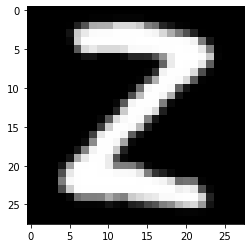

In [8]:
#for train data
for t in range(len(X_train)):
    X_train[t]=np.transpose(X_train[t])
    
#checking
plt.imshow(X_train[0], cmap='gray')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

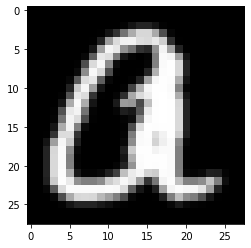

In [9]:
#for test data  
for t in range(116323):
    X_test[t]=np.transpose(X_test[t])
    

#checking
plt.imshow(X_test[1], cmap='gray')
plt.show

## Reshaping train and test data again for input into model

In [10]:
X_train = X_train.reshape(X_train.shape[0], 784,1)
X_test = X_test.reshape(X_test.shape[0], 784,1)

## Creating Model

In [18]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
from keras.constraints import maxnorm
from keras.utils import np_utils

In [19]:
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

In [20]:
train_images = X_train.astype('float32')
test_images = X_test.astype('float32')

In [21]:
train_images = resh(train_images)
test_images = resh(test_images)

In [22]:
train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)

In [23]:
K.set_learning_phase(1)

model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Convolution2D(32, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))

model.add(Dropout(0.1))

model.add(Dense(62, activation='softmax'))

opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [24]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 62)                31806     
Total para

In [ ]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=128, epochs=20)

W1104 21:03:34.185251   540 deprecation.py:323] From C:\Anaconda\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 697932 samples, validate on 116323 samples
Epoch 1/20
697932/697932 [==============================] - 307s 440us/step - loss: 0.5286 - acc: 0.8235 - val_loss: 0.4255 - val_acc: 0.8486
Epoch 2/20
697932/697932 [==============================] - 337s 483us/step - loss: 0.4005 - acc: 0.8557 - val_loss: 0.3963 - val_acc: 0.8571
Epoch 3/20
697932/697932 [==============================] - 365s 523us/step - loss: 0.3754 - acc: 0.8625 - val_loss: 0.3856 - val_acc: 0.8603
Epoch 4/20
697932/697932 [==============================] - 365s 523us/step - loss: 0.3604 - acc: 0.8665 - val_loss: 0.3812 - val_acc: 0.8610
Epoch 5/20
697932/697932 [==============================] - 365s 522us/step - loss: 0.3489 - acc: 0.8694 - val_loss: 0.3811 - val_acc: 0.8613
Epoch 6/20
697932/697932 [==============================] - 365s 522us/step - loss: 0.3396 - acc: 0.8724 - val_loss: 0.3780 - val_acc: 0.8628
Epoch 7/20
697932/697932 [==============================] - 365s 523us/step - loss: 0.3310 - acc

In [ ]:
#evaluating model on test data. will take time
scores = model.evaluate(test_images,test_labels, verbose = 0)
print("Accuracy: %.2f%%"%(scores[1]*100))

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
objects = ('RMSDrop', 'Adam', 'Adamax', 'SGD', 'Adadelta')
y_pos = np.arange(len(objects))
performance = [86.2,85.39,89.53,84.29,87.11]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Optimizers')
plt.ylim(50,100)
plt.show()

In [ ]:
m = X_test[259].reshape(28,28)
plt.imshow(m, cmap='gray')
plt.show()
print('prediction: '+str(chr(model.predict_classes(X_test[259].reshape(1,784)))))

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#saves the model info as json file
    
model.save_weights("model.h5")
# Creates a HDF5 file 'model.h5'